In [3]:
# setup core dependencies 
import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D, MaxPooling2D, Activation
%matplotlib inline

Using TensorFlow backend.


[trimesh_main]
[get_ShapeNet_paths]
[generate_renders_from_mesh]


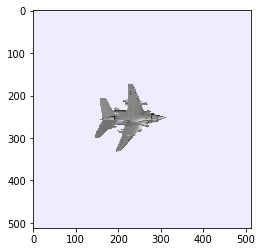

In [4]:
# generate data
%run construct_input.py
X=constuct_input_matrix("Renders");
input_shape=X.shape[1:]

# display sample from data
plt.imshow(random.choice(X))

In [5]:
net = keras.models.Sequential()
n_convfilter = [96, 128, 256, 256, 256, 256]
n_kernel_size=[(7, 7),(3,3),(3,3),(3,3),(3,3),(3,3)]
n_fc_filters = [1024]
n_deconvfilter = [128, 128, 128, 64, 32, 2]

In [6]:
# encoder network
for i in range(6):
    net.add(Conv2D(filters=n_convfilter[i],kernel_size= n_kernel_size[i],input_shape=input_shape))
    net.add(MaxPooling2D())
    net.add(Activation('relu'))

In [ ]:
# 

In [10]:
net.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
os.system("rm -rf ./logs/*")
tensor_board=keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

In [12]:
net.fit(X,np.random.rand(len(X), 5, 5, 256),epochs=5,callbacks=[tensor_board])

Epoch 1/1
3/3 [==============================] - 10s 3s/step - loss: 1318.0469 - acc: 0.0000e+00
